In [0]:
import pandas as pd


In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter08/agaricus-lepiota.data'

In [0]:
mushrooms = pd.read_csv(file_url, header=None)

In [0]:
y_raw = mushrooms.iloc[:,0]
X_raw = mushrooms.iloc[:,1:]
y = (y_raw == 'p') * 1


In [0]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()

encoder.fit(X_raw)

X = encoder.transform(X_raw).toarray()


In [15]:
#Initialize the classifier.
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

#Conduct a grid search.
from sklearn import model_selection
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, cv=5, scoring='accuracy')
gscv.fit(X,y)
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

#Conduct a random search.
from scipy import stats
max_features = X.shape[1]
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)
rscv.fit(X,y)
results = pd.DataFrame(rscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.301006,0.145874,0.018649,0.000799,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
25,1.379076,0.130510,0.019421,0.001139,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
29,1.450202,0.181256,0.018925,0.000592,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.000000,1.0,0.995692,1.0,0.739532,0.947045,0.103770,3
41,1.413311,0.165802,0.019399,0.000656,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
10,1.407619,0.162515,0.019561,0.000364,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
18,0.333631,0.013399,0.023233,0.000796,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
15,0.351805,0.008639,0.024512,0.001421,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
46,1.415277,0.156048,0.019376,0.000566,gini,107,"{'criterion': 'gini', 'max_features': 107}",1.000000,1.0,0.996308,1.0,0.708128,0.940887,0.116388,8
49,0.388543,0.017453,0.020680,0.000988,entropy,11,"{'criterion': 'entropy', 'max_features': 11}",0.842462,1.0,1.000000,1.0,0.860837,0.940660,0.072909,9
39,0.476013,0.015536,0.020850,0.001163,gini,18,"{'criterion': 'gini', 'max_features': 18}",0.842462,1.0,1.000000,1.0,0.841749,0.936842,0.077353,10


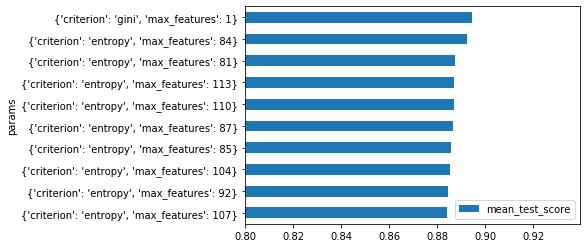

In [16]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)

(
    results.sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .drop_duplicates()
    .head(10)
    .plot.barh(x='params', xlim=(0.8))
)